| Variable Name | Role    | Type         | Demographic | Description                                        | units | Missing Values |
|---------------|---------|--------------|-------------|----------------------------------------------------|------
| age           | Feature | Integer      | Age         | Age of the patient                                          |
| sex           | Feature | Categorical  | Sex         | Gender of the patient                              |  
| cp            | Feature | Categorical  |             | Type of chest pain                                 |       
| trestbps      | Feature | Integer      |             | Resting blood pressure | mm Hg | no                |
| chol          | Feature | Integer      |             | Serum cholesterol                                  | 
| fbs           | Feature | Categorical  |             | Fasting blood sugar > 120 mg/dl                    |       
| restecg       | Feature | Categorical  |             | Resting electrocardiographic results               |       
| thalach       | Feature | Integer      |             | Maximum heart rate achieved                        |       
| exang         | Feature | Categorical  |             | Exercise induced angina                            |       
| oldpeak       | Feature | Integer      |             | ST depression induced by exercise relative to rest |       


In [3]:
# Heart Disease Analysis and Prediction
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

/Users/aliadabi/.pyenv/versions/t385/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
## Data Loading and Preprocessing


url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=column_names)

df = df.replace('?', np.nan)
df.dropna(inplace=True)
df[['ca', 'thal']] = df[['ca', 'thal']].astype(float)

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.9415

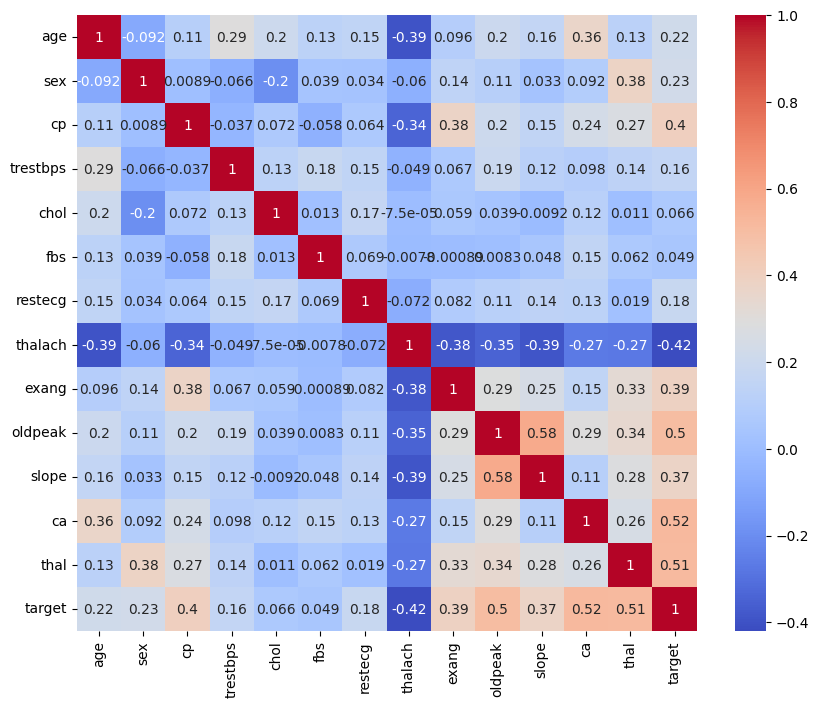

In [5]:
print(df.describe())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

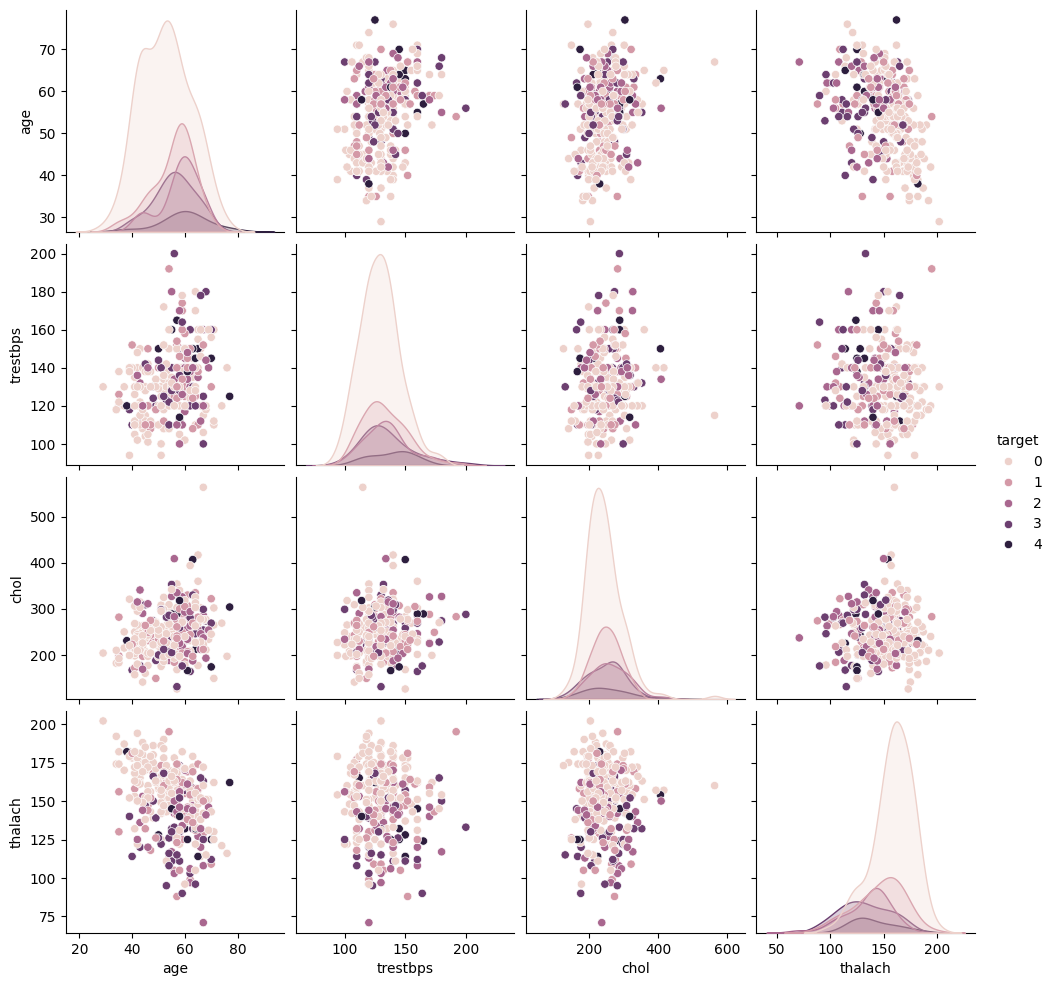

In [6]:
sns.pairplot(df, hue='target', vars=['age', 'trestbps', 'chol', 'thalach'])
plt.show()

In [7]:
X = df.drop('target', axis=1)
y = df['target'].apply(lambda x: 1 if x > 0 else 0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f'CV Average Score: {np.mean(cv_scores)}')

predictions = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(classification_report(y_test, predictions))


CV Average Score: 0.8246892655367232
Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



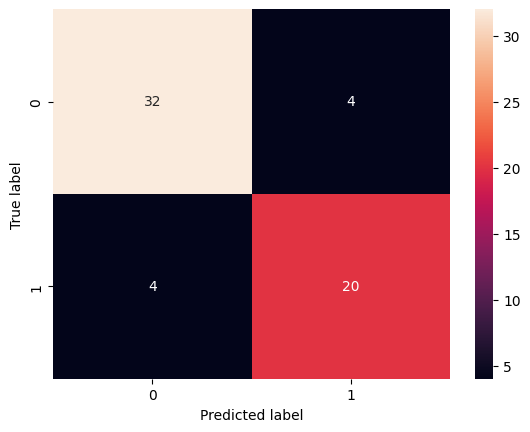

In [9]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

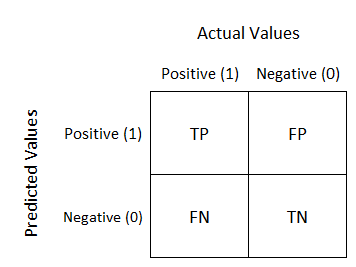